In [ ]:
import pandas as pd
import chardet

# Function to detect the file encoding
def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

# Load the datasets
orders_df = pd.read_csv('orders.csv')
order_details_df = pd.read_csv('order_details.csv')
pizzas_df = pd.read_csv('pizzas.csv')
pizza_types_encoding = detect_encoding('pizza_types.csv')
pizza_types_df = pd.read_csv('pizza_types.csv', encoding=pizza_types_encoding)



In [ ]:

# Perform the join operations
merged_df = pd.merge(orders_df, order_details_df, on='order_id')
merged_df = pd.merge(merged_df, pizzas_df, on='pizza_id')
merged_df = pd.merge(merged_df, pizza_types_df, on='pizza_type_id')

# Optional: Save the merged dataset to a new CSV file
merged_df.to_csv('merged_dataset.csv', index=False)


In [ ]:
import pandas as pd
#df = pd.read_csv('merged_dataset.csv')
df = pd.read_csv('merged_dataset.csv', encoding='utf-8')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48620 non-null  int64  
 1   date              48620 non-null  object 
 2   time              48620 non-null  object 
 3   order_details_id  48620 non-null  int64  
 4   pizza_id          48620 non-null  object 
 5   quantity          48620 non-null  int64  
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [ ]:
df

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,77,2015-01-02,12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,146,2015-01-03,14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,163,2015-01-03,16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,247,2015-01-04,20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,21167,2015-12-27,17:39:57,48176,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."
48616,21198,2015-12-28,15:39:02,48244,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."
48617,21225,2015-12-29,13:20:17,48311,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."
48618,21282,2015-12-31,12:09:59,48456,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."


In [ ]:
# Sales Analysis
total_sales_revenue = (merged_df['price'] * merged_df['quantity']).sum()
sales_trends = merged_df.groupby('date')['quantity'].sum()
#popular_pizzas = merged_df.groupby(['pizza_type_id', 'size']).size().reset_index(name='count')


In [ ]:
total_sales_revenue


817860.05

In [ ]:
sales_trends

date
2015-01-01    162
2015-01-02    165
2015-01-03    158
2015-01-04    106
2015-01-05    125
             ... 
2015-12-27     89
2015-12-28    102
2015-12-29     80
2015-12-30     82
2015-12-31    178
Name: quantity, Length: 358, dtype: int64

In [ ]:
# Popular pizzas - sorted by count in descending order
popular_pizzas1 = merged_df.groupby(['pizza_type_id', 'size']).size().reset_index(name='count')
popular_pizzas1 = popular_pizzas1.sort_values('count', ascending=False)


In [ ]:
# Sales trends - sorted by date in ascending order
sales_trends1 = merged_df.groupby('date')['quantity'].sum().sort_values()



sales_trends1

date
2015-03-22     77
2015-12-29     80
2015-12-30     82
2015-11-22     84
2015-12-27     89
             ... 
2015-07-03    213
2015-07-04    234
2015-10-15    262
2015-11-27    264
2015-11-26    266
Name: quantity, Length: 358, dtype: int64

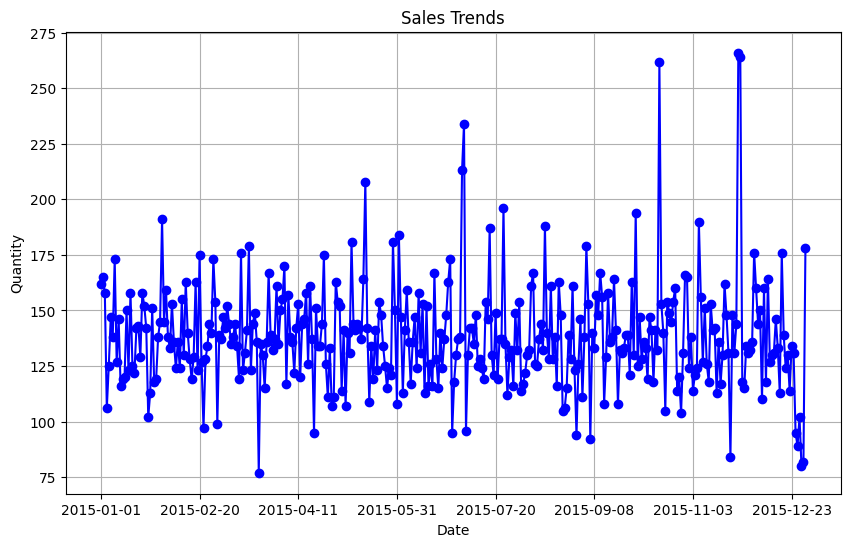

In [ ]:
import matplotlib.pyplot as plt

# Sales trends - sorted by date in ascending order
sales_trends = merged_df.groupby('date')['quantity'].sum().sort_index()

# Plotting the sales trends
plt.figure(figsize=(10, 6))
sales_trends.plot(kind='line', marker='o', linestyle='-', color='blue')

# Customize the plot
plt.title('Sales Trends')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
popular_pizzas1

,pizza_type_id,size,count
3,big_meat,S,1811
80,thai_ckn,L,1365
20,five_cheese,L,1359
21,four_cheese,L,1273
18,classic_dlx,M,1159
...,...,...,...
43,mexicana,S,160
7,calabrese,S,99
13,ckn_alfredo,S,96
23,green_garden,L,94


<Figure size 1000x600 with 0 Axes>

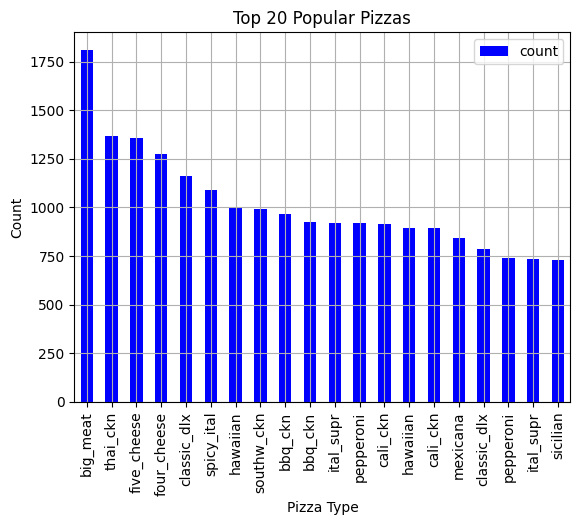

In [ ]:
import matplotlib.pyplot as plt

# Top 50 popular pizzas - sorted by count in descending order
top_pizzas = popular_pizzas1.head(20)

# Plotting the top 50 popular pizzas
plt.figure(figsize=(10, 6))
top_pizzas.plot(kind='bar', x='pizza_type_id', y='count', color='blue')

# Customize the plot
plt.title('Top 20 Popular Pizzas')
plt.xlabel('Pizza Type')
plt.ylabel('Count')
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
# Customer Analysis
customer_segmentation = df.groupby('order_id').agg(
    order_count=('order_id', 'count'),
    total_spending=('price', 'sum'),
    preferred_pizza_types=('pizza_type_id', pd.Series.mode)
)
customer_lifetime_value = df.groupby('order_id').agg(
    clv=('price', 'sum')
)



In [ ]:
customer_segmentation

,order_count,total_spending,preferred_pizza_types
order_id,,,
1,1,13.25,hawaiian
2,5,92.00,"[classic_dlx, five_cheese, ital_supr, mexicana..."
3,2,37.25,"[ital_supr, prsc_argla]"
4,1,16.50,ital_supr
5,1,16.50,ital_supr
...,...,...,...
21346,4,62.25,cali_ckn
21347,4,66.50,"[bbq_ckn, ital_supr, peppr_salami, southw_ckn]"
21348,3,46.70,"[ckn_alfredo, four_cheese, napolitana]"


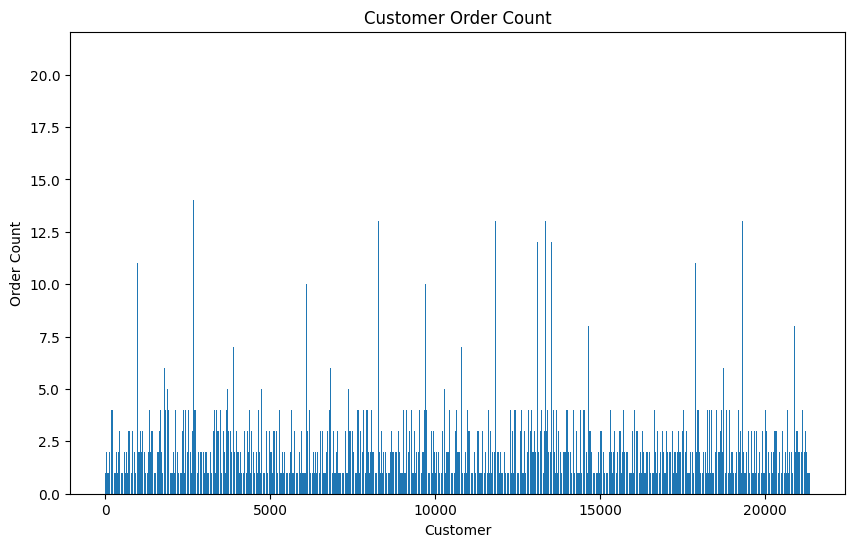

In [ ]:
import matplotlib.pyplot as plt

# Plotting the customer order count
plt.figure(figsize=(10, 6))
plt.bar(customer_segmentation.index, customer_segmentation['order_count'])
plt.xlabel('Customer')
plt.ylabel('Order Count')
plt.title('Customer Order Count')
plt.show()


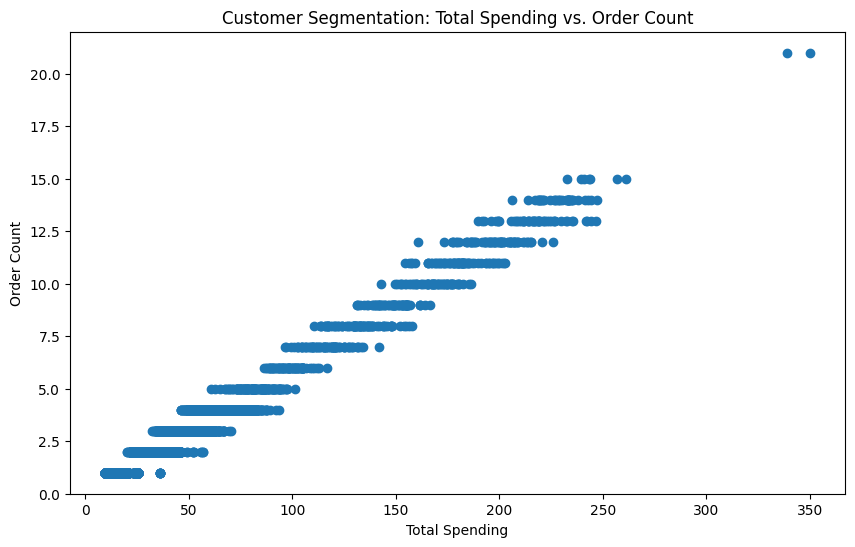

In [ ]:

# Plotting total spending vs. order count
plt.figure(figsize=(10, 6))
plt.scatter(customer_segmentation['total_spending'], customer_segmentation['order_count'])
plt.xlabel('Total Spending')
plt.ylabel('Order Count')
plt.title('Customer Segmentation: Total Spending vs. Order Count')
plt.show()


In [ ]:
# Counting preferred pizza types
pizza_type_counts = customer_segmentation['preferred_pizza_types'].value_counts()

# Plotting preferred pizza types
plt.figure(figsize=(10, 6))
plt.pie(pizza_type_counts, labels=pizza_type_counts.index, autopct='%1.1f%%')
plt.title('Preferred Pizza Types')
plt.axis('equal')
plt.show()


In [ ]:
customer_lifetime_value

,clv
order_id,
1,13.25
2,92.00
3,37.25
4,16.50
5,16.50
...,...
21346,62.25
21347,66.50
21348,46.70


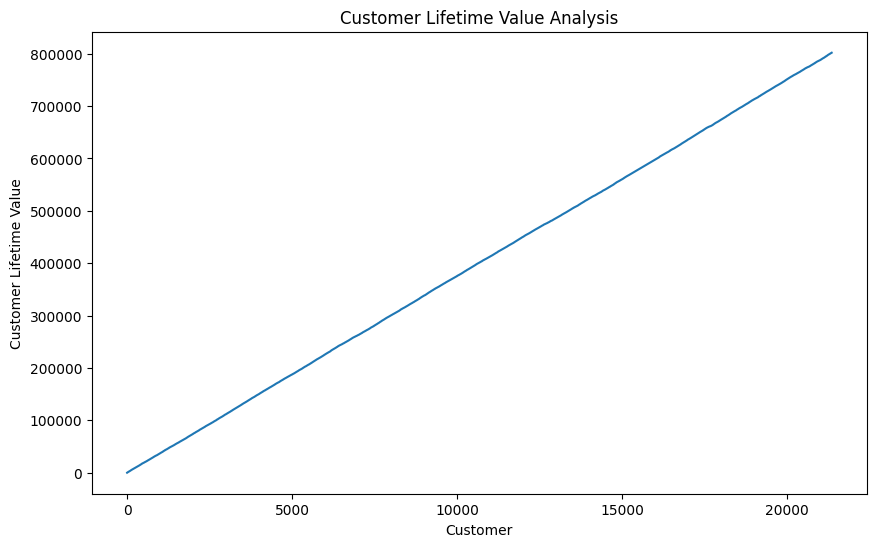

In [ ]:
import matplotlib.pyplot as plt

# Grouping and aggregating data
customer_lifetime_value = df.groupby('order_id').agg(
    clv=('price', 'sum')
)

# Calculating cumulative sum of customer lifetime value
customer_lifetime_value['clv_cumulative'] = customer_lifetime_value['clv'].cumsum()

# Plotting customer lifetime value
plt.figure(figsize=(10, 6))
plt.plot(customer_lifetime_value.index, customer_lifetime_value['clv_cumulative'])
plt.xlabel('Customer')
plt.ylabel('Customer Lifetime Value')
plt.title('Customer Lifetime Value Analysis')
plt.show()


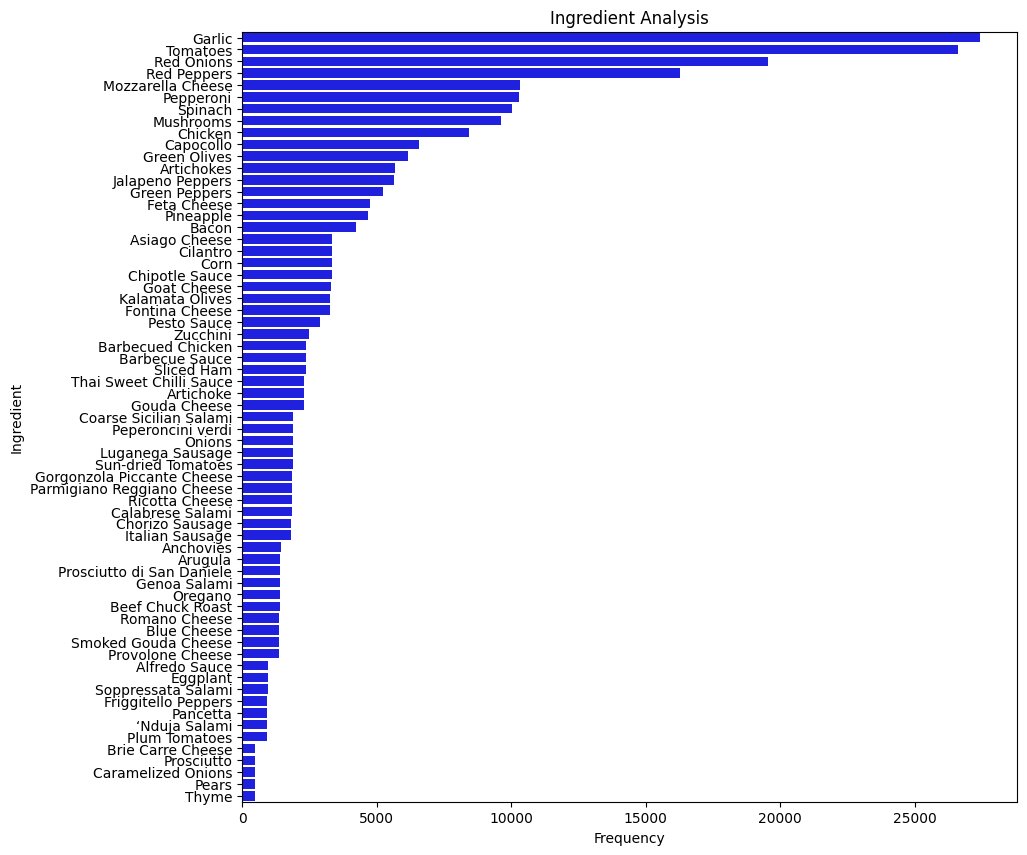

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Analyzing frequency of ingredients
ingredient_freq = df['ingredients'].str.split(', ').explode().value_counts().reset_index()
ingredient_freq.columns = ['ingredient', 'frequency']

# Sorting ingredients by frequency in descending order
ingredient_freq = ingredient_freq.sort_values('frequency', ascending=False)

# Plotting ingredient analysis
plt.figure(figsize=(10, 10))
sns.barplot(x='frequency', y='ingredient', data=ingredient_freq, color='blue')
plt.title('Ingredient Analysis')
plt.xlabel('Frequency')
plt.ylabel('Ingredient')
plt.show()


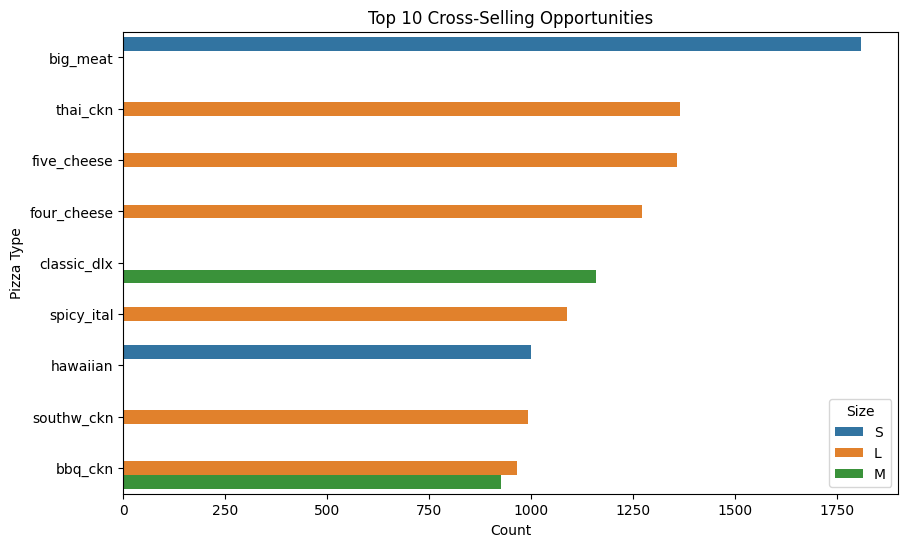

In [ ]:
# Analyzing combinations of pizza types and sizes
pizza_combinations = df.groupby(['pizza_type_id', 'size']).size().reset_index(name='count')
pizza_combinations = pizza_combinations.sort_values('count', ascending=False)

# Plotting cross-selling opportunities
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='pizza_type_id', hue='size', data=pizza_combinations[:10])
plt.title('Top 10 Cross-Selling Opportunities')
plt.xlabel('Count')
plt.ylabel('Pizza Type')
plt.legend(title='Size')
plt.show()


In [ ]:
df.describe()

,order_id,order_details_id,quantity,price
count,48620.000000,48620.000000,48620.000000,48620.000000
mean,10701.479761,24310.500000,1.019622,16.494132
std,6180.119770,14035.529381,0.143077,3.621789
min,1.000000,1.000000,1.000000,9.750000
25%,5337.000000,12155.750000,1.000000,12.750000
50%,10682.500000,24310.500000,1.000000,16.500000
75%,16100.000000,36465.250000,1.000000,20.250000
max,21350.000000,48620.000000,4.000000,35.950000


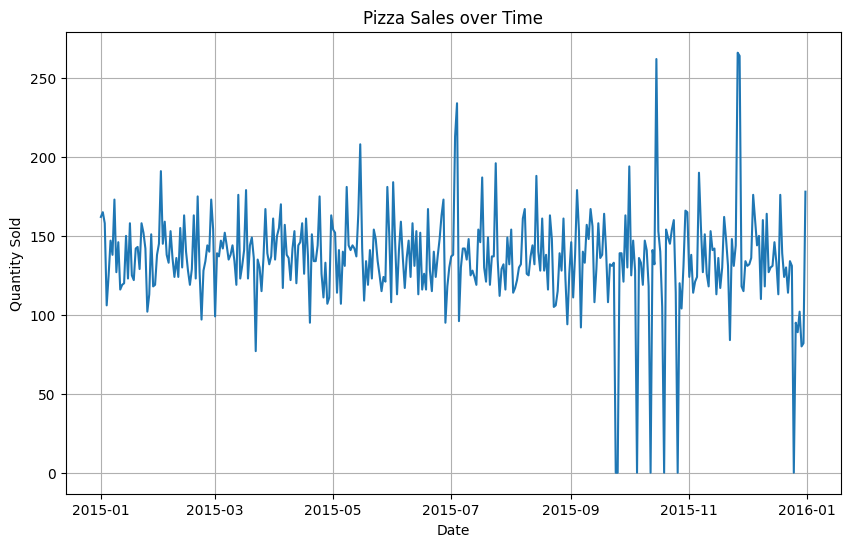

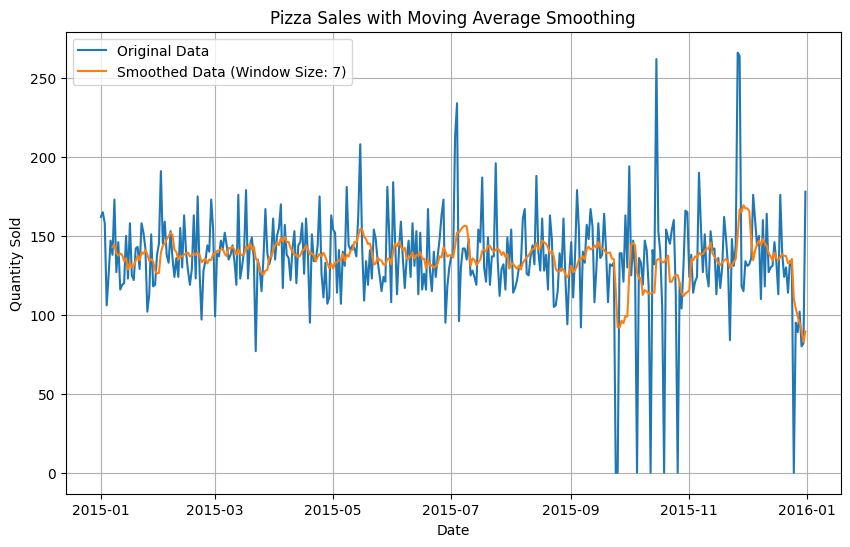

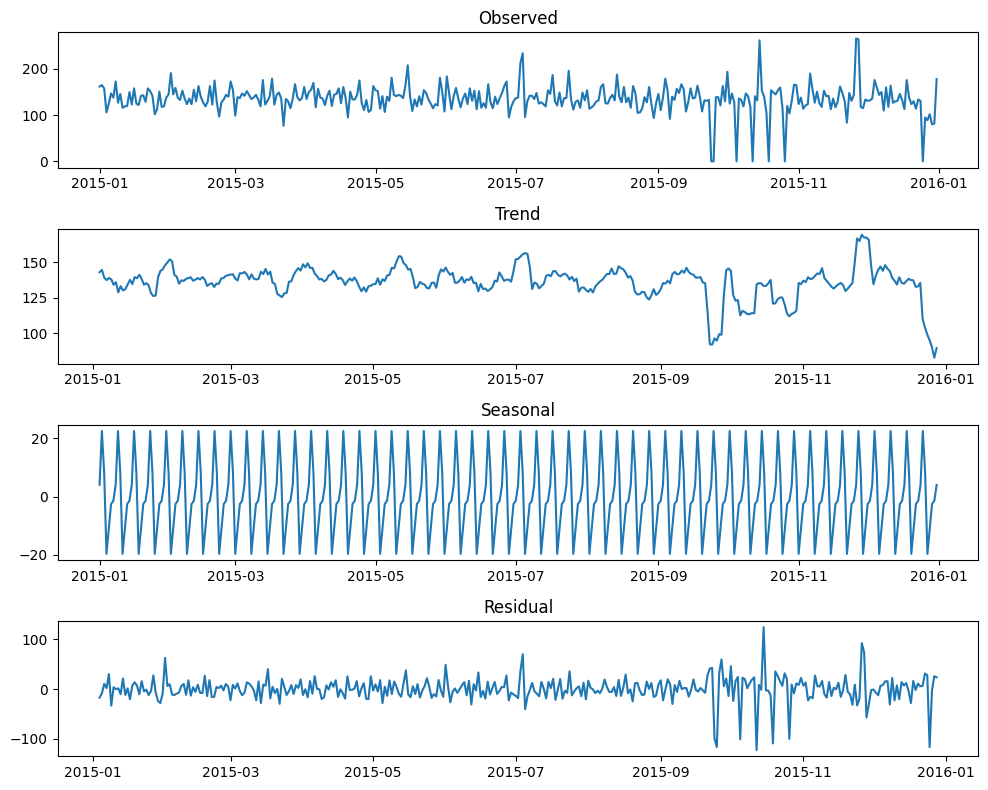

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Read the dataset and prepare for time series analysis
df_tsd = df.copy()
df_tsd['date'] = pd.to_datetime(df_tsd['date'])
df_tsd.set_index('date', inplace=True)
df_tsd.sort_index(inplace=True)

# Resample the data to daily frequency
df_tsd = df_tsd['quantity'].resample('D').sum()  # Use 'D' for daily data, adjust as per your data frequency

# Visualize the time series
plt.figure(figsize=(10, 6))
plt.plot(df_tsd)
plt.title('Pizza Sales over Time')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.show()

# Perform smoothing (e.g., moving average)
window_size = 7  # Adjust the window size as per your preference
rolling_mean = df_tsd.rolling(window=window_size).mean()

# Plot original and smoothed data
plt.figure(figsize=(10, 6))
plt.plot(df_tsd, label='Original Data')
plt.plot(rolling_mean, label=f'Smoothed Data (Window Size: {window_size})')
plt.title('Pizza Sales with Moving Average Smoothing')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend()
plt.grid(True)
plt.show()

# Perform decomposition
result = seasonal_decompose(df_tsd, model='additive')

# Plot the decomposition components
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(result.observed)
plt.title('Observed')
plt.subplot(412)
plt.plot(result.trend)
plt.title('Trend')
plt.subplot(413)
plt.plot(result.seasonal)
plt.title('Seasonal')
plt.subplot(414)
plt.plot(result.resid)
plt.title('Residual')
plt.tight_layout()
plt.show()


In [ ]:
df_tsd

date
2015-01-01    162
2015-01-02    165
2015-01-03    158
2015-01-04    106
2015-01-05    125
             ... 
2015-12-27     89
2015-12-28    102
2015-12-29     80
2015-12-30     82
2015-12-31    178
Freq: D, Name: quantity, Length: 365, dtype: int64

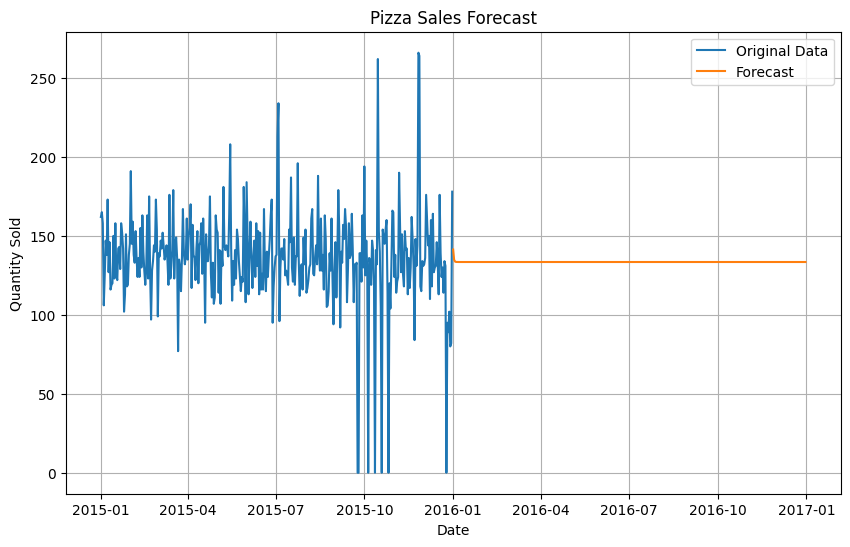

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# Forecasting using ARIMA model
model = ARIMA(df_tsd, order=(1, 1, 1))
model_fit = model.fit()

# Forecast future values
forecast = model_fit.predict(start=len(df_tsd), end=len(df_tsd) + 365)

# Plot the original data and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df_tsd.index, df_tsd.values, label='Original Data')
plt.plot(forecast.index, forecast.values, label='Forecast')
plt.title('Pizza Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df_recommended = df.copy()

# Convert 'date' column to datetime format
df_recommended['date'] = pd.to_datetime(df_recommended['date'])

# Count number of unique customers each day
customers_per_day = df_recommended.groupby('date')['order_id'].nunique()

# Find peak hours
df_recommended['hour'] = pd.to_datetime(df_recommended['time'], format='%H:%M:%S').dt.hour
peak_hours = df_recommended.groupby('hour').size()

# Print the number of customers per day
print(customers_per_day)

# Print the peak hours
print(peak_hours)


date
2015-01-01    69
2015-01-02    67
2015-01-03    66
2015-01-04    52
2015-01-05    54
              ..
2015-12-27    35
2015-12-28    39
2015-12-29    27
2015-12-30    32
2015-12-31    73
Name: order_id, Length: 358, dtype: int64
hour
9        4
10      17
11    2672
12    6543
13    6203
14    3521
15    3170
16    4185
17    5143
18    5359
19    4350
20    3487
21    2528
22    1370
23      68
dtype: int64


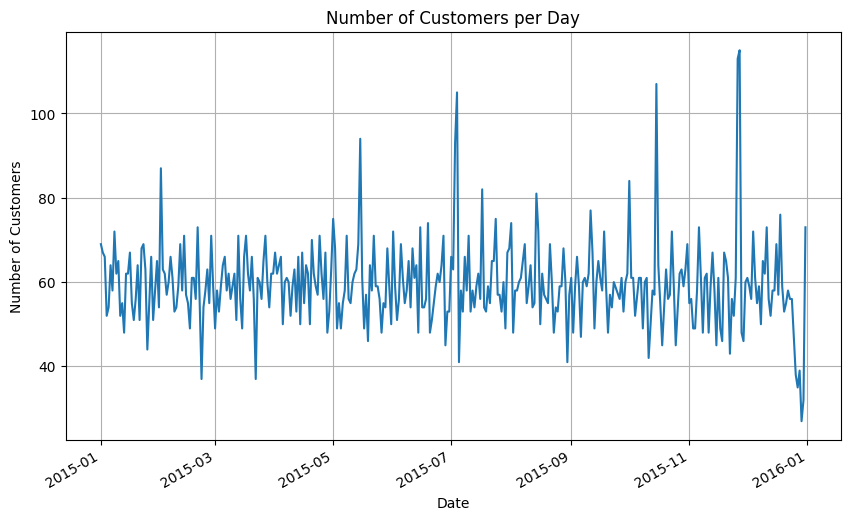

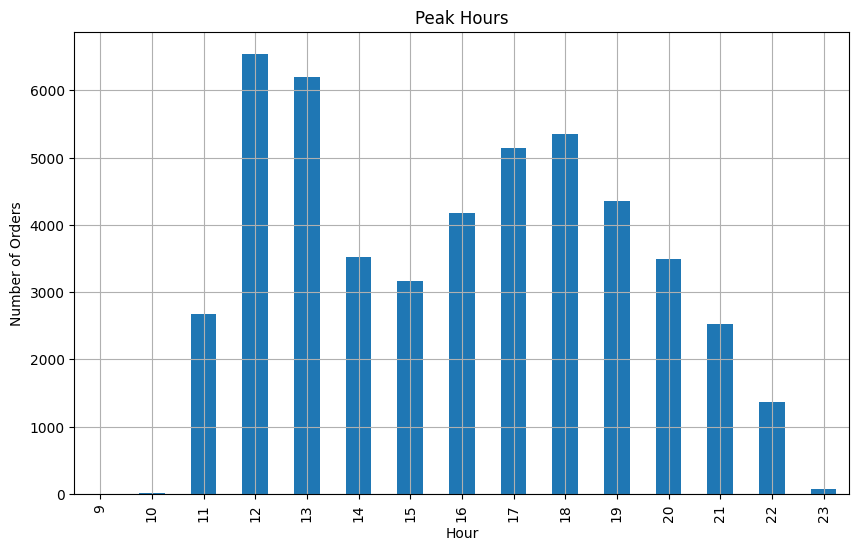

In [ ]:
import matplotlib.pyplot as plt

# Plot the number of unique customers per day
plt.figure(figsize=(10, 6))
customers_per_day.plot(kind='line')
plt.title('Number of Customers per Day')
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

# Plot the peak hours
plt.figure(figsize=(10, 6))
peak_hours.plot(kind='bar')
plt.title('Peak Hours')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

In [ ]:
# Calculate the number of pizzas per order
pizzas_per_order = df_recommended.groupby('order_id')['quantity'].sum()

# Calculate the average number of pizzas per order
average_pizzas_per_order = pizzas_per_order.mean()

# Identify the bestsellers
bestsellers = df_recommended.groupby('pizza_id')['quantity'].sum().sort_values(ascending=False)

# Print the average number of pizzas per order
print("Average pizzas per order:", average_pizzas_per_order)

# Print the bestsellers
print("Bestsellers:")
print(bestsellers.head())


Average pizzas per order: 2.321967213114754
Bestsellers:
pizza_id
big_meat_s       1914
thai_ckn_l       1410
five_cheese_l    1409
four_cheese_l    1316
classic_dlx_m    1181
Name: quantity, dtype: int64


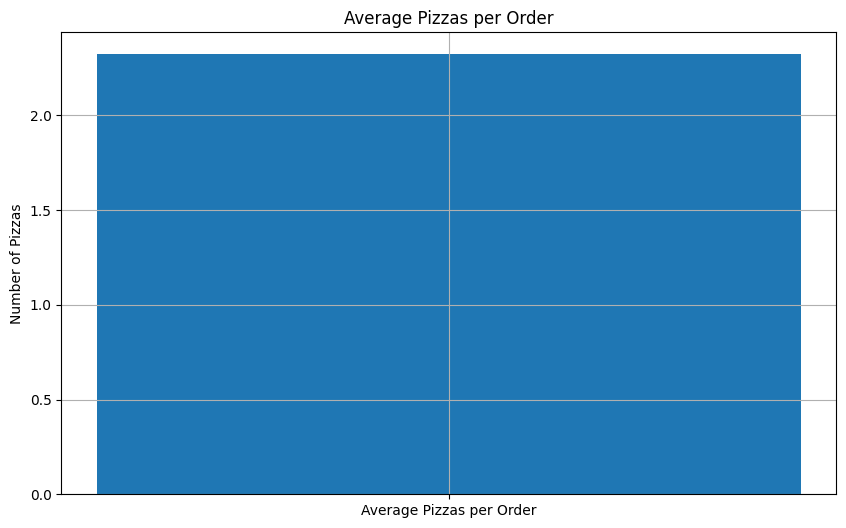

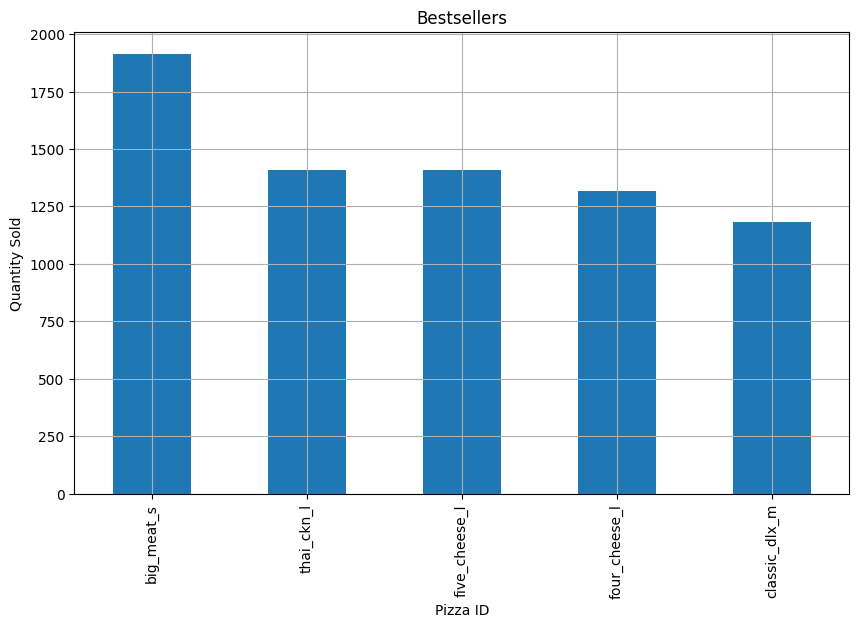

In [ ]:
# Plot the average number of pizzas per order
plt.figure(figsize=(10, 6))
# Specify the size of the bars
bar_width = 0.2
plt.bar('Average Pizzas per Order', average_pizzas_per_order, width = bar_width)
plt.title('Average Pizzas per Order')
plt.ylabel('Number of Pizzas')
plt.grid(True)
plt.show()

# Plot the bestsellers
plt.figure(figsize=(10, 6))
bestsellers.head().plot(kind='bar')
plt.title('Bestsellers')
plt.xlabel('Pizza ID')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.show()

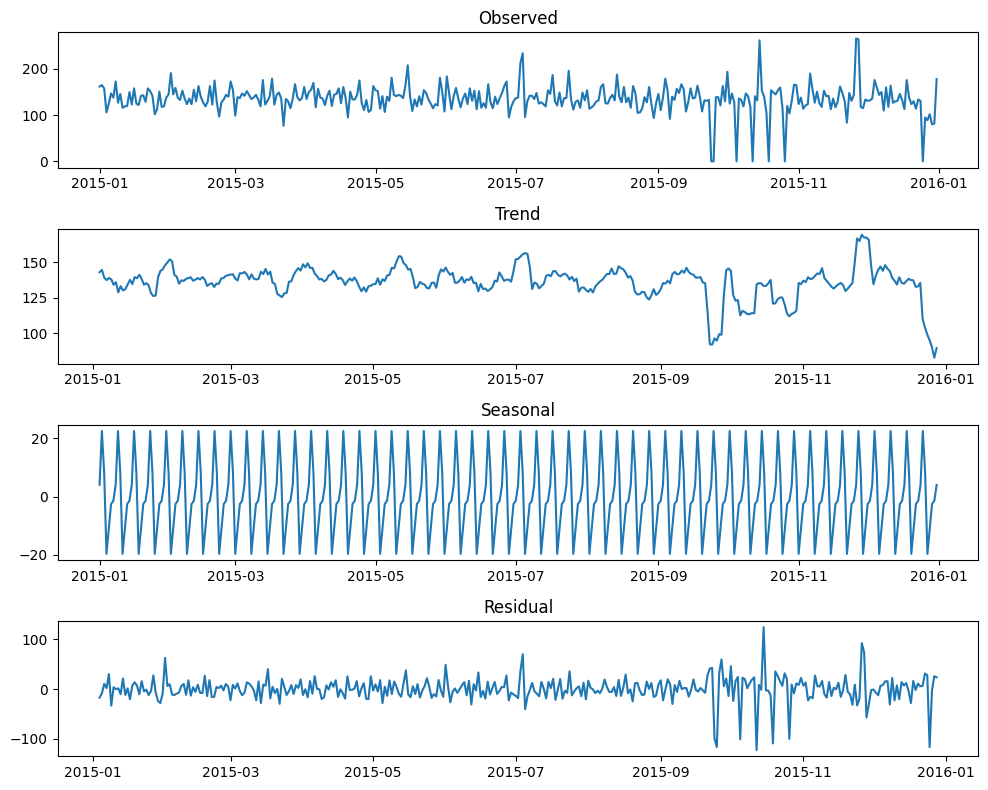

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

df = pd.read_csv('merged_dataset.csv', encoding='utf-8')
df_recommended = df.copy()
# Convert 'date' column to datetime format
df_recommended['date'] = pd.to_datetime(df_recommended['date'])

# Set 'date' column as the index
df_recommended.set_index('date', inplace=True)

# Resample the data to a specific frequency (e.g., daily, monthly)
df_resampled = df_recommended['quantity'].resample('D').sum()  # Adjust 'D' as per your desired frequency

# Perform seasonal decomposition
result = seasonal_decompose(df_resampled, model='additive')

# Plot the observed, trend, seasonal, and residual components
# Plot the observed, trend, seasonal, and residual components
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(result.observed)
plt.title('Observed')
plt.subplot(412)
plt.plot(result.trend)
plt.title('Trend')
plt.subplot(413)
plt.plot(result.seasonal)
plt.title('Seasonal')
plt.subplot(414)
plt.plot(result.resid)
plt.title('Residual')
plt.tight_layout()
plt.show()


Low Sales Pizzas:
pizza_id
calabrese_s       99
ckn_alfredo_s     96
green_garden_l    95
the_greek_xxl     28
Name: quantity, dtype: int64


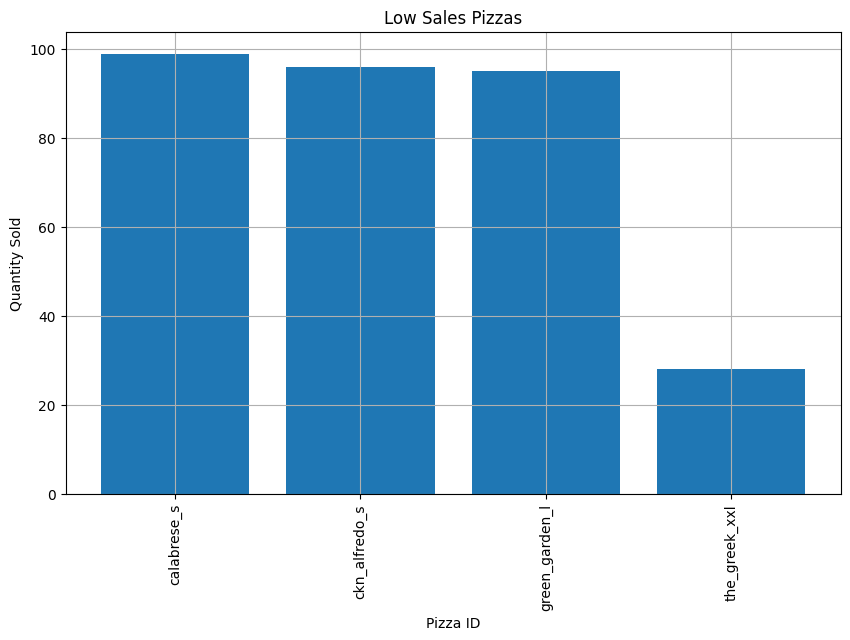

In [ ]:
pizza_sales = df_recommended.groupby('pizza_id')['quantity'].sum()
threshold = 150
low_sales_pizzas = pizza_sales[pizza_sales < threshold]  # Adjust 'threshold' as desired

# Print low sales pizzas
print("Low Sales Pizzas:")
print(low_sales_pizzas)


# Plot low sales pizzas
plt.figure(figsize=(10, 6))
plt.bar(low_sales_pizzas.index, low_sales_pizzas.values)
plt.title('Low Sales Pizzas')
plt.xlabel('Pizza ID')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()
